In [85]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split 
from math import sqrt
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import MinMaxScaler 
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

data = pd.read_csv('creditcard.csv' , sep=',')


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284909 entries, 0 to 284908
Data columns (total 31 columns):
Time      284909 non-null int64
V1        284909 non-null object
V2        284909 non-null object
V3        284909 non-null object
V4        284909 non-null object
V5        284909 non-null object
V6        284909 non-null object
V7        284909 non-null float64
V8        284909 non-null float64
V9        284909 non-null float64
V10       284909 non-null float64
V11       284909 non-null float64
V12       284909 non-null float64
V13       284909 non-null float64
V14       284909 non-null float64
V15       284909 non-null float64
V16       284909 non-null float64
V17       284909 non-null float64
V18       284909 non-null float64
V19       284909 non-null float64
V20       284909 non-null float64
V21       284909 non-null float64
V22       284909 non-null float64
V23       284909 non-null float64
V24       284909 non-null object
V25       284909 non-null object
V26       28490

In [87]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284909 entries, 0 to 284908
Data columns (total 31 columns):
Time      284909 non-null int64
V1        284909 non-null object
V2        284909 non-null object
V3        284909 non-null object
V4        284909 non-null object
V5        284909 non-null object
V6        284909 non-null object
V7        284909 non-null float64
V8        284909 non-null float64
V9        284909 non-null float64
V10       284909 non-null float64
V11       284909 non-null float64
V12       284909 non-null float64
V13       284909 non-null float64
V14       284909 non-null float64
V15       284909 non-null float64
V16       284909 non-null float64
V17       284909 non-null float64
V18       284909 non-null float64
V19       284909 non-null float64
V20       284909 non-null float64
V21       284909 non-null float64
V22       284909 non-null float64
V23       284909 non-null float64
V24       284909 non-null object
V25       284909 non-null object
V26       28490

In [88]:
data.describe()

,Time,V7,V8,V9,V10,V11,V12,V13,V14,V15,...,V19,V20,V21,V22,V23,V26,V27,V28,Amount,Class
count,284909.000000,284909.000000,2.849090e+05,284909.000000,284909.000000,284909.000000,284909.000000,284909.000000,284909.000000,284909.000000,...,284909.000000,284909.000000,284909.000000,284909.000000,284909.000000,284909.000000,284909.000000,284909.000000,284909.000000,284909.000000
mean,94826.986259,0.000171,-9.434918e-07,-0.000010,0.000002,-0.000179,-0.000015,-0.000082,-0.000065,-0.000087,...,-0.000051,-0.000043,0.000012,0.000078,0.000004,0.000003,-0.000013,-0.000024,88.377411,0.001727
std,47485.356111,1.238456,1.194284e+00,1.098634,1.088858,1.020704,0.999100,0.995248,0.958601,0.915340,...,0.814020,0.771120,0.734477,0.725728,0.624450,0.482240,0.403712,0.330074,250.395279,0.041520
min,0.000000,-43.557242,-7.321672e+01,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,...,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54215.000000,-0.554068,-2.086343e-01,-0.643099,-0.535465,-0.762624,-0.405605,-0.648564,-0.425604,-0.582953,...,-0.456307,-0.211761,-0.228390,-0.542335,-0.161859,-0.326979,-0.070856,-0.052972,5.600000,0.000000
50%,84728.000000,0.040103,2.235024e-02,-0.051416,-0.092926,-0.032868,0.139926,-0.013625,0.050601,0.047875,...,0.003738,-0.062497,-0.029435,0.006832,-0.011192,-0.052114,0.001341,0.011233,22.000000,0.000000
75%,139310.000000,0.570497,3.273893e-01,0.597165,0.453998,0.739334,0.618108,0.662416,0.493119,0.648726,...,0.458867,0.133017,0.186431,0.528673,0.147643,0.240944,0.091033,0.078281,77.180000,0.000000
max,172792.000000,120.589494,2.000721e+01,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,...,5.591971,39.420904,27.202839,10.503090,22.528412,3.517346,31.612198,33.847808,25691.160000,1.000000


In [89]:
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283827 entries, 0 to 284908
Data columns (total 31 columns):
Time      283827 non-null int64
V1        283827 non-null object
V2        283827 non-null object
V3        283827 non-null object
V4        283827 non-null object
V5        283827 non-null object
V6        283827 non-null object
V7        283827 non-null float64
V8        283827 non-null float64
V9        283827 non-null float64
V10       283827 non-null float64
V11       283827 non-null float64
V12       283827 non-null float64
V13       283827 non-null float64
V14       283827 non-null float64
V15       283827 non-null float64
V16       283827 non-null float64
V17       283827 non-null float64
V18       283827 non-null float64
V19       283827 non-null float64
V20       283827 non-null float64
V21       283827 non-null float64
V22       283827 non-null float64
V23       283827 non-null float64
V24       283827 non-null object
V25       283827 non-null object
V26       28382

In [90]:
data.describe()

,Time,V7,V8,V9,V10,V11,V12,V13,V14,V15,...,V19,V20,V21,V22,V23,V26,V27,V28,Amount,Class
count,283827.000000,283827.000000,283827.000000,283827.000000,283827.000000,283827.000000,283827.000000,283827.000000,283827.000000,283827.000000,...,283827.000000,283827.000000,283827.000000,283827.000000,283827.000000,283827.000000,283827.000000,283827.000000,283827.000000,283827.000000
mean,94824.121493,0.001973,-0.000859,-0.001602,-0.001440,0.000029,-0.000728,0.000523,0.000186,0.000959,...,-0.000309,0.000146,-0.000360,0.000060,0.000202,0.000152,0.001751,0.000523,88.500822,0.001667
std,47478.280460,1.229047,1.178990,1.095495,1.076422,1.018706,0.994575,0.995405,0.952224,0.914918,...,0.813351,0.770181,0.723867,0.724577,0.623694,0.482066,0.395828,0.328018,250.675629,0.040789
min,0.000000,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,...,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54219.000000,-0.552503,-0.208839,-0.644220,-0.535610,-0.761795,-0.406221,-0.647907,-0.425759,-0.581548,...,-0.456287,-0.211510,-0.228305,-0.542683,-0.161716,-0.326763,-0.070649,-0.052842,5.600000,0.000000
50%,84728.000000,0.040862,0.021889,-0.052596,-0.093239,-0.032549,0.139026,-0.012981,0.050202,0.049186,...,0.003381,-0.062376,-0.029433,0.006740,-0.011154,-0.052161,0.001472,0.011279,22.000000,0.000000
75%,139287.500000,0.570559,0.325733,0.595985,0.453642,0.739325,0.616882,0.663105,0.492284,0.650001,...,0.458459,0.133191,0.186223,0.528394,0.147753,0.240255,0.091198,0.078277,77.520000,0.000000
max,172792.000000,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,...,5.591971,39.420904,27.202839,10.503090,22.528412,3.517346,31.612198,33.847808,25691.160000,1.000000


In [91]:
cols= data.columns[data.dtypes.eq(object)]
for c in cols:
    data[c] = pd.to_numeric(data[c], errors='coerce')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283827 entries, 0 to 284908
Data columns (total 31 columns):
Time      283827 non-null int64
V1        283825 non-null float64
V2        283826 non-null float64
V3        283826 non-null float64
V4        283826 non-null float64
V5        283825 non-null float64
V6        283826 non-null float64
V7        283827 non-null float64
V8        283827 non-null float64
V9        283827 non-null float64
V10       283827 non-null float64
V11       283827 non-null float64
V12       283827 non-null float64
V13       283827 non-null float64
V14       283827 non-null float64
V15       283827 non-null float64
V16       283827 non-null float64
V17       283827 non-null float64
V18       283827 non-null float64
V19       283827 non-null float64
V20       283827 non-null float64
V21       283827 non-null float64
V22       283827 non-null float64
V23       283827 non-null float64
V24       283812 non-null float64
V25       283821 non-null float64
V26    

In [93]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283798 entries, 0 to 284907
Data columns (total 31 columns):
Time      283798 non-null int64
V1        283798 non-null float64
V2        283798 non-null float64
V3        283798 non-null float64
V4        283798 non-null float64
V5        283798 non-null float64
V6        283798 non-null float64
V7        283798 non-null float64
V8        283798 non-null float64
V9        283798 non-null float64
V10       283798 non-null float64
V11       283798 non-null float64
V12       283798 non-null float64
V13       283798 non-null float64
V14       283798 non-null float64
V15       283798 non-null float64
V16       283798 non-null float64
V17       283798 non-null float64
V18       283798 non-null float64
V19       283798 non-null float64
V20       283798 non-null float64
V21       283798 non-null float64
V22       283798 non-null float64
V23       283798 non-null float64
V24       283798 non-null float64
V25       283798 non-null float64
V26    

In [94]:
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284807
Data columns (total 31 columns):
Time      283726 non-null int64
V1        283726 non-null float64
V2        283726 non-null float64
V3        283726 non-null float64
V4        283726 non-null float64
V5        283726 non-null float64
V6        283726 non-null float64
V7        283726 non-null float64
V8        283726 non-null float64
V9        283726 non-null float64
V10       283726 non-null float64
V11       283726 non-null float64
V12       283726 non-null float64
V13       283726 non-null float64
V14       283726 non-null float64
V15       283726 non-null float64
V16       283726 non-null float64
V17       283726 non-null float64
V18       283726 non-null float64
V19       283726 non-null float64
V20       283726 non-null float64
V21       283726 non-null float64
V22       283726 non-null float64
V23       283726 non-null float64
V24       283726 non-null float64
V25       283726 non-null float64
V26    

In [95]:
y=data['Class']
y=np.asarray(y)

In [96]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


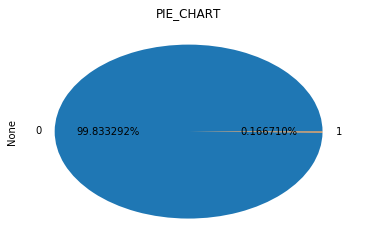

In [97]:
s = data.groupby("Class").size()
s.plot(kind='pie', autopct='%1.6f%%', title="PIE_CHART")

In [98]:
del data['Class']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284807
Data columns (total 30 columns):
Time      283726 non-null int64
V1        283726 non-null float64
V2        283726 non-null float64
V3        283726 non-null float64
V4        283726 non-null float64
V5        283726 non-null float64
V6        283726 non-null float64
V7        283726 non-null float64
V8        283726 non-null float64
V9        283726 non-null float64
V10       283726 non-null float64
V11       283726 non-null float64
V12       283726 non-null float64
V13       283726 non-null float64
V14       283726 non-null float64
V15       283726 non-null float64
V16       283726 non-null float64
V17       283726 non-null float64
V18       283726 non-null float64
V19       283726 non-null float64
V20       283726 non-null float64
V21       283726 non-null float64
V22       283726 non-null float64
V23       283726 non-null float64
V24       283726 non-null float64
V25       283726 non-null float64
V26    

In [99]:
del data['Time']

In [100]:
data.describe()
x=np.asarray(data)
x1=x
y1=y

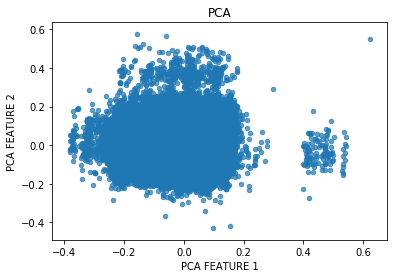

In [101]:
x2 = x
scaler = MinMaxScaler()
x2=scaler.fit_transform(x2)
pca = PCA(n_components=2)
pca.fit(x2)
T = pca.transform(x2)
T = pd.DataFrame(T)
T.columns = ['PCA FEATURE 1', 'PCA FEATURE 2']
T.plot.scatter(x='PCA FEATURE 1', y='PCA FEATURE 2', marker='o',alpha=0.7, title="PCA")

In [102]:
scaler = MinMaxScaler()
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.1, random_state=0)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(x_train)
result = kmeans.predict(x_test)
print(accuracy_score(result, y_test))
print(sqrt(mean_squared_error(result, y_test)))

0.32203150882881615
0.823388420596


In [103]:
x1 = stats.zscore(x1)
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1, test_size=0.1, random_state=0)
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(x1_train)
result1 = kmeans.predict(x1_test)
print(accuracy_score(result1, y1_test.round()))
print(sqrt(mean_squared_error(result1, y1_test.round())))

0.9774080992492863
0.150306023667


In [104]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.1, random_state=0)
kmeans = KMeans(n_clusters=2, max_iter=1000, algorithm = 'auto')
kmeans.fit(x_train)
result = kmeans.predict(x_test)
print (accuracy_score(result, y_test))
print (sqrt(mean_squared_error(result, y_test)))

0.9788531350227329
0.145419616893


In [105]:
np.corrcoef(y_test, result)

array([[1.        , 0.01509506],
       [0.01509506, 1.        ]])